In [1]:
# 경로 이동
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [2]:
# 최초 1회 수행
#!git clone https://github.com/sgrvinod/a-PyTorch-Tutorial-to-Object-Detection.git

In [18]:
from glob import glob 
import json

# json 파일 경로 수집
path = '/content/drive/MyDrive/Colab Notebooks/RCV_SSD_Tutorial/'
json_path = glob(path + '*.json')
json_files = [filename for filename in json_path if not (filename.endswith('_objects.json') or filename.endswith("_map.json"))]
test_path = json_files[1]
# 기존 경로
# /content/drive/MyDrive/SSD_tutorial/pascal_voc/VOC2007/JPEGImages/000005.jpg

# 내 경로
# /content/drive/MyDrive/Colab Notebooks/RCV_SSD_Tutorial/TRAIN_images.json
# 경로 수정!
for json_file_path in json_files:

  with open(json_file_path, 'r') as f:
    data = f.read()

  d = json.loads(data)
  d = [x.replace('/SSD_tutorial/', '/Colab Notebooks/RCV_SSD_Tutorial/') for x in d]

  if json_file_path == test_path:
    d = [x.replace('/VOC2007/', '/VOC2007_test/') for x in d]

  with open(json_file_path, 'w') as f:
    f.write(json.dumps(d))

In [4]:
!pwd

/content/drive/MyDrive/Colab Notebooks


In [5]:
%cd /content/drive/MyDrive/Colab Notebooks/RCV_SSD_Tutorial

/content/drive/MyDrive/Colab Notebooks/RCV_SSD_Tutorial


In [6]:
ls -al

ls: pascal_voc: No such file or directory
total 2994808
-rw------- 1 root root  210480822 Jan  8 00:57 checkpoint_ssd300.pth.tar
-rw------- 1 root root        234 Jan  6 02:23 create_data_lists.py
-rw------- 1 root root       2942 Jan  6 03:01 datasets.py
-rw------- 1 root root       3325 Jan  7 09:00 datasets.pyc
-rw------- 1 root root       4352 Jan  6 02:23 detect.py
-rw------- 1 root root       3186 Jan  6 02:23 eval.py
drwx------ 2 root root       4096 Jan  6 02:23 .git/
drwx------ 2 root root       4096 Jan  6 02:23 img/
drwx------ 2 root root       4096 Jan  6 03:06 .ipynb_checkpoints/
-rw------- 1 root root        283 Dec 31 11:30 label_map.json
-rw------- 1 root root       1073 Jan  6 02:23 LICENSE
-rw------- 1 root root      33014 Jan  7 13:27 model.py
-rw------- 1 root root      20137 Jan  7 09:00 model.pyc
lrw------- 1 root root          0 Jan  6 04:54 pascal_voc -> /content/drive/.shortcut-targets-by-id/132/pascal_voc/
-rw------- 1 root root 2112472345 Jan  6 03:55 pascal_

In [7]:
!nvidia-smi

Fri Jan  8 01:05:50 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [9]:
!python train.py


Loaded checkpoint from epoch 196.

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
100


200


Epoch: [196][0/2069]	Batch Time 11.064 (11.064)	Data Time 7.650 (7.650)	Loss 1.7304 (1.7304)	
Epoch: [196][200/2069]	Batch Time 3.482 (1.827)	Data Time 3.296 (1.623)	Loss 1.1143 (1.8828)	
Epoch: [196][400/2069]	Batch Time 0.188 (1.810)	Data Time 0.000 (1.614)	Loss 1.8932 (1.8904)	
Epoch: [196][600/2069]	Batch Time 0.191 (1.801)	Data Time 0.000 (1.607)	Loss 1.6257 (1.8955)	
Epoch: [196][800/2069]	Batch Time 0.188 (1.798)	Data Time 0.000 (1.606)	Loss 1.0663 (1.8892)	
Epoch: [196][1000/2069]	Batch Time 0.190 (1.790)	Data Time 0.000 (1.599)	Loss 1.7609 (1.8919)	
Epoch: [196][1200/2069]	Batch Time 0.186 (1.787)	Data Time 0.000 (1.596)	Loss 2.1889 (1.8896)	
Epoch: [196][1400/2069]	Batch Time 4.390 (1.785)	Data Time 4.203 (1.595)	Loss 2.1752 (1.89

In [28]:
!python eval.py

Evaluating:   0% 0/78 [00:00<?, ?it/s]/content/drive/MyDrive/Colab Notebooks/RCV_SSD_Tutorial/model.py:501: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /pytorch/aten/src/ATen/native/IndexingUtils.h:25.)
  image_boxes.append(class_decoded_locs[1 - suppress])
/content/drive/MyDrive/Colab Notebooks/RCV_SSD_Tutorial/model.py:503: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /pytorch/aten/src/ATen/native/IndexingUtils.h:25.)
  image_scores.append(class_scores[1 - suppress])
Evaluating: 100% 78/78 [05:53<00:00,  4.53s/it]
{'aeroplane': 0.7821771502494812,
 'bicycle': 0.8530651926994324,
 'bird': 0.7636930346488953,
 'boat': 0.7083463668823242,
 'bottle': 0.4898110330104828,
 'bus': 0.8632195591926575,
 'car': 0.8592910766601562,
 'cat': 0.8908288478851318,
 'chair': 0.5764678716659546,
 'cow': 0.826225757598877,
 'diningtable

In [ ]:
len(true_difficulties)

In [ ]:
len(det_scores)

In [34]:
import PIL
from detect import detect

In [39]:
!pwd

/content/drive/My Drive/Colab Notebooks/RCV_SSD_Tutorial


In [51]:
img_path = '/content/drive/MyDrive/Colab Notebooks/RCV_SSD_Tutorial/pascal_voc/VOC2007_test/JPEGImages/000008.jpg'
original_image = PIL.Image.open(img_path, mode='r')
original_image = original_image.convert('RGB')

test = detect(original_image, min_score=0.2, max_overlap=0.5, top_k=200)

/content/drive/MyDrive/Colab Notebooks/RCV_SSD_Tutorial/model.py:501: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /pytorch/aten/src/ATen/native/IndexingUtils.h:25.)
  image_boxes.append(class_decoded_locs[1 - suppress])
/content/drive/MyDrive/Colab Notebooks/RCV_SSD_Tutorial/model.py:503: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /pytorch/aten/src/ATen/native/IndexingUtils.h:25.)
  image_scores.append(class_scores[1 - suppress])


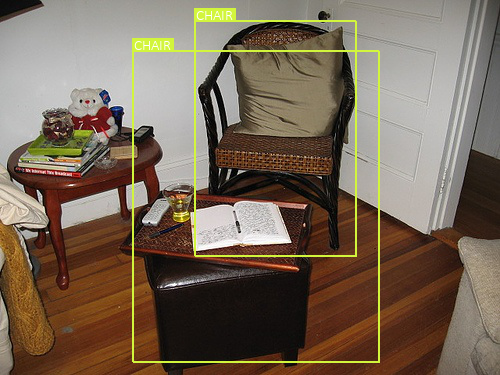

In [52]:
test